# JSC270S - Tutorial \#4 - Part 2: Statistical Inference

## Profs. F. Chevalier and N. Taback


## Due date: Sunday February 17, 2019. 11:59pm.


****
## Instructions

- This Part 2 of Tutorial #4 is individual.
- Answer the questions below.

### What should be submitted?

- A *Jupyter notebook* using Python that contains all the data analyses. Make sure to comment your code in the code cells.

- Additional files that your notebook requires to compile properly (e.g. a data file).

- A pdf of your Jupyter notebook exported as a pdf file.  This can be done using [`nbconvert`](https://nbconvert.readthedocs.io/en/latest/install.html).


### When should it be submitted?

- Upload your answers by 11:59pm on Sunday February 17, 2019. 


### Where should the assignment be submitted?

Push your finished notebook and any other files to <https://classroom.github.com/a/T9jzDN-r>

Upload the pdf of your answer notebook to the JSC270 course page on Quercus.

***

## Tutorial Grading

Tutorials will be graded according to the following marking scheme.

<table>
  <tr>
    <th></th>
    <th>Marks</th>
  </tr>
  <tr>
    <td>Tutorial Participation</td>
    <td>5</td>
  </tr>
  <tr>
    <td>Attendance for entire tutorial</td>
    <td>5</td>
  </tr>
  <tr>
    <td>In-lab tutorial assignment</td>
    <td>20</td>
  </tr>
  <tr>
    <td>Tutorial assignment completion</td>
    <td>20</td>
  </tr>
</table>


# Question 1

Use the influenza data from tutorial 2 to answer the following questions.

Is the proportion of influenza cases in Manitoba different compared to New Bruswick?

(a) Conduct a permutation test to evaluate this question. What are the assumptions behind this test? What is the p-value?  What do you conclude?

## Answers for Question 1
a) 

Assumptions: the two test groups are independent.

Null hypothesis: There is no difference between the mean proportion of influenza cases between Manitoba and New Bruswick. 
$P_{MB} = P_{NB}$ where $P_{MB}$ is the proportion of influenza cases of Manitoba and $P_{NB}$ is the proportion of influenza cases of New Bruswick. 

Alternative hypothesis: $P_{MB}\geq P_{NB}$

p-value: 0.855

Conclusion: we cannot reject the null hypothesis, there is some evidence that there is no difference between the mean proportion of influenza cases between Manitoba and New Bruswick. 

In [2]:
# import data

import pandas as pd
webpage = 'https://www.canada.ca/en/public-health/services/surveillance/respiratory-virus-detections-canada/2018-2019/respiratory-virus-detections-isolations-week-01-ending-january-5-2019.html'

df = pd.read_html(webpage) # returns a list of tables 
df[1] # by inspection we see that Table 2 is the first table

 # select. rows corresponding to prov and territory
fludat = df[1].iloc[[0, 1, 2, 3, 11, 28, 29, 32, 33, 35, 36, 37, 38]]
url = 'https://en.wikipedia.org/wiki/List_of_regions_of_Canada#National_regions'
df = pd.read_html(url, header=0, attrs = {"class":"wikitable"})
Regions = df[0][['All provinces and territories', 'Six-region model[1]']]

Regions = (Regions
           # propogate non-null values forward
           .fillna(method = 'ffill', axis = 0) 
           # rename columns
           .rename(columns={"All provinces and territories": "prov", 
                            "Six-region model[1]": "region"})
           .replace(['Newfoundland and Labrador'], ['Newfoundland']))  

# Change province names so they match in both data sets

fludat = (fludat
          .replace('Province of', '', regex = True)
          .replace('Québec', 'Quebec', regex = True)
          .rename(columns={"Reporting Laboratory": "prov"}))

#Alberta, Ontario, Quebec, Sask have extra white space in their names so remove

fludat['prov'] = fludat['prov'].str.strip()

# Merge regions with flu data and only keep required columns

fludat1 = pd.merge(fludat, Regions, on = 'prov').iloc[0:,[0,1,2,3,4,5,23]]
fludat1.iloc[:, 1:6] = fludat1.iloc[:, 1:6].astype(int)

# create Proportion of Flu A Positive (defined as the ratio of 
# Total Flu A Positive to Flu Tested)

fludat1['propfluA'] = (fludat1
                       .apply(lambda x: x['Total Flu A Positive']/x['Flu Tested'],axis=1))

fludat2 = fludat1[[list(fludat1)[0],list(fludat1)[1], list(fludat1)[5], list(fludat1)[6],list(fludat1)[7] ]]

In [3]:
# perform the test
import numpy as np
import matplotlib.pyplot as plt

# conduct permutation
MB_tested = int(fludat2.at[6, 'Flu Tested'])
MB_case = int(fludat2.at[6, 'Total Flu A Positive'])
NB_tested = int(fludat2.at[3, 'Flu Tested'])
NB_case = int(fludat2.at[3, 'Total Flu A Positive'])
MB_cases = np.concatenate((np.repeat(1, MB_case), np.repeat(0, MB_tested-MB_case)))
NB_cases = np.concatenate((np.repeat(1, NB_case), np.repeat(0, NB_tested-NB_case)))
cases = np.concatenate((NB_cases, MB_cases))
provl = np.concatenate((np.repeat('NB',NB_tested),np.repeat('MB',MB_tested)))

def prop_perm_test(data):
    np.random.shuffle(data)
    return data[provl=='MB'].mean() - data[provl=='NB'].mean()

diff = MB_case/MB_tested - NB_case/NB_tested
N = 10000
null_dist = [prop_perm_test(cases) for x in range(N)] 

plt.hist(null_dist,edgecolor = 'black', bins = 20, color = '#e9a3c9')
plt.xlabel('Difference in Proportions')
plt.title('Randomization Distribution of Proportion Differences');
plt.axvline(x = diff, color = '#a1d76a', linewidth = 4)
p_value = (sum([i <= diff for i in null_dist]) + 1) / (N + 1)
print("The p-value is: ", np.round(p_value,3))

The p-value is:  0.0


(b) Conduct a Z-test to evaluate this question.  What are the assumptions behind this test? What is the p-value?  What do you conclude?

b)

Assumptions: for both groups, the proportion of the province follows Normal distribution.

Null hypothesis: There is no difference between the mean proportion of influenza cases between Manitoba and New Bruswick. 
$P_{MB} = P_{NB}$ where $P_{MB}$ is the proportion of influenza cases of Manitoba and $P_{NB}$ is the proportion of influenza cases of New Bruswick. 

Alternative hypothesis: $P_{MB}\geq P_{NB}$

p-value: 0.839

Conclusion: we cannot reject the null hypothesis, there is some evidence that there is no difference between the mean proportion of influenza cases between Manitoba and New Bruswick. 



In [4]:
# Answer for Question 1b) 
from statsmodels.stats.proportion import proportions_ztest

nobs = np.array([MB_tested, NB_tested])
count = np.array([MB_case, NB_case])

obsZ, pval = proportions_ztest(count, nobs, alternative="smaller")
obsZ, np.around(pval, 4)

(-5.102127811541359, 0.0)

# Question 2

In class 5 we discussed this example.

$$\begin{align*}
H_0 &: \text{region and and subtype of influenza are independent,} \\ 
H_a &: \text{region and subtype of influenza are dependent}.
\end{align*}$$


(a) Write a Python program to calculate the permutation distribution to test of independence of region and subtype of influenza. Create an appropriate vizualization of this distribution.

In [5]:
# answer for Q2a
fludat1.iloc[:, 1:6] = fludat1.iloc[:, 1:6].astype(int)
region_df = fludat1.iloc[:,[2,3,4,6]].groupby('region').sum()

In [6]:
region_df

,A(H1N1)pdm09 Positive,A(H3) Positive,A(UnS) Positive
region,,,
Atlantic,81,1,880
British Columbia,1010,75,755
Ontario,752,180,546
Prairies,4604,136,2775
Quebec,0,0,5974
Territories,162,3,6


In [7]:
from scipy.stats.contingency import expected_freq
expect = expected_freq(region_df.iloc[:,[0,1,2]])
# the summand for each cell
sum_i = (pow((np.array(region_df.iloc[:,[0,1,2]]) - expect),2)/
         expect)
#sum over cells
obs_chisq = np.sum(sum_i)

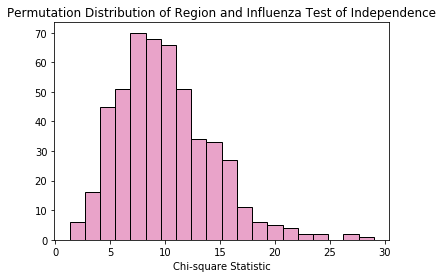

In [8]:
cases = []
region = []
regions = list(region_df.index)
for r in regions:
    cases += list(np.repeat(0, int(region_df.at[r, "A(H1N1)pdm09 Positive"])))
    cases += list(np.repeat(1, int(region_df.at[r, "A(H3) Positive"])))
    cases += list(np.repeat(2, int(region_df.at[r, "A(UnS) Positive"])))
    region += list(np.repeat(r, int(region_df.at[r, "A(H1N1)pdm09 Positive"]) + 
                                 int(region_df.at[r, "A(H3) Positive"]) + 
                                 int(region_df.at[r, "A(UnS) Positive"])))
cases = np.array(cases)
region = np.array(region)

def perm(cases):
    l = np.empty([len(regions),3])
    np.random.shuffle(cases)
    for i in range(len(regions)):
        l[i][0] = sum(cases[region == regions[i]] == 0)
        l[i][1] = sum(cases[region == regions[i]] == 1)
        l[i][2] = sum(cases[region == regions[i]] == 2)
    sum_i = (pow(l - expect, 2)/ expect)
    return np.sum(sum_i)

N = 500

permdist = [perm(cases) for x in range(N)] 

plt.hist(permdist,edgecolor = 'black', bins = 20, color = '#e9a3c9')
plt.xlabel('Chi-square Statistic')
plt.title('Permutation Distribution of Region and Influenza Test of Independence');

(b) Use the permutation distribution in (a) calculate the p-value of the test.

In [9]:
# answer for Q2b
print('The observed value of the chi-square statistic is', np.round(obs_chisq))
print('The p-value is: ', sum(np.array(permdist) >= obs_chisq)/N)

The observed value of the chi-square statistic is 7585.0
The p-value is:  0.0


(c) What can you conclude about region and subtype of influenza based on the results in part (b)?  

### Answer for Q2c

- We can reject the null hypothesis that region and subtype of influenza are independent. Therefore, there is strong evidence that regions and subtype of influenza are dependent. 

# Question 3

This question involves investigating type I and II error rates for testing two proportions.  

(a) Explain how to simulate the type I error rate for a Z-test of two proportions.

### Answer for Q3a

- We can randomly generate two sample groups from the same distribution and do Z-test on the proportion of success and find the p-value. Repeatedly do so $n$ times. Say we reject the null hypothesis (when $p\leq \alpha$) $m$ times, then the type I error rate is $m/n$.

(b) Write a program in Python to simulate the type I error rate of the Z-test for two proportions.  What is your type I error rate for your simulation?  Assume the sample size in each group is 200 and $\alpha=0.05$.

In [10]:
# code for Q3a
sample_size = 200
level = 0.05

N = 1000
count = 0
for i in range(N):
    z, p = proportions_ztest([np.random.binomial(sample_size, 0.4), 
                              np.random.binomial(sample_size, 0.4)], 
                             [200, 200])
    count += 1 if p < level else 0
print("The type I error rate of the Z-test is: ", count/N)

The type I error rate of the Z-test is:  0.048


(c) Explain how to simulate the power for testing two proportions.

### Answer for Q3c

- We can randomly generate two sample groups from distributions of different parameters and do Z-test on the proportion of success for $n$ times. Say we accept the null hypothesis $m$ times, then the power is $1-m/n$

(d) Write a program in Python to simulate the power of the Z-test for two proportions.  What is the power and type II error rate for your simulation?  Assume the sample size in each group is 200, $\alpha=0.05$, and the true proportion in one group is 0.45 and the true proportion in the other group is 0.57.

In [11]:
# code for Q3d
N = 1000
count = 0
for i in range(N):
    z, p = proportions_ztest([np.random.binomial(sample_size, 0.45), 
                              np.random.binomial(sample_size, 0.57)], 
                             [200, 200])
    count += 1 if p >= level else 0
print("The power is: ", 1- count/N)
print("The type II error rate is: ", count/N)

The power is:  0.6579999999999999
The type II error rate is:  0.342


# Question 4

Let $X$ be the number of purchases from and $n$ the number of visitors to the website.  The website owner is testing two versions of a web page on her site.  In a one-week period: 1874 visitors were randomized to page A, and 52 visitors made a purchase; and 1871 visitors were randomized to page B and 55 made a purchase. 


(a) Assume that the probability of a purchase is uniformly distributed.  Calculate the probability that the proportion of visitors to page B that make a purchase is greater than the proportion of visitors to page A.  Explain how you arrived at your answer.

The probability that visitors to page B that make a purchase is greater than the proportion of visitors to page A is
 0.61692


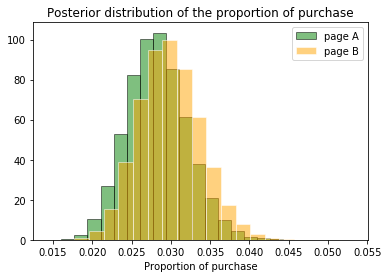

In [12]:
# Codefor Q4a
import scipy as sp

N = 100000
# group A
post_dist_A = sp.stats.beta.rvs(52+1,1874+1-52,size=N)
plt.hist(post_dist_A, edgecolor = 'black', bins = 20, color = 'green', density = True, alpha=0.5)

# group B
post_dist_B = sp.stats.beta.rvs(55+1,1871+1-55,size=N)
plt.hist(post_dist_B, edgecolor = 'white', bins = 20, color = 'orange', density = True, alpha=0.5)
plt.legend(['page A','page B'])
plt.title("Posterior distribution of the proportion of purchase")
plt.xlabel("Proportion of purchase");

# find probability
print("The probability that visitors to page B that make a purchase is greater than the proportion of visitors to page A is\n",
      sum([post_dist_A[i] < post_dist_B[i] for i in range(N)])/N)

### Answer for Q4a

- By the assumption that the probability of a purchase is uniformly distributed, we can calculate the posterior distribution from the observation. Therefore, we can randomly generate two distributions of the proportion of purchase and find the probability that visitors to page B that make a purchase is greater than the proportion of visitors to page A by generating random samples from the distribution and compare whether the proportion of page A is greater than that of page A.

(b) Compare your result in (a) to a statistical hypothesis test.  Which test is more informative? Briefly explain.  

In [13]:
# Answer for Q4b
count = np.array([52, 55])
nobs = np.array([1874, 1871])
stat, pval = proportions_ztest(count, nobs, alternative="smaller")
print("Test statistic: ", stat)
print("p-value: ", pval)
print("power: ", 1-pval)

Test statistic:  -0.30266243745757404
p-value:  0.38107356322060243
power:  0.6189264367793976


### Answer for Q4b

- Notice that the probability obtained in a) is the same to the power obtained in b). Therefore, they gives the similar information.